<a href="https://colab.research.google.com/github/Dhananjana97/ML-Ride-Fair/blob/master/pickup_time_binned2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Import common Modules

In [ ]:
import pandas as pd
import numpy as np
import xlrd



import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

from datetime import datetime




# FileLoad

In [ ]:
train_df=pd.read_csv('/content/drive/My Drive/ML Project/train.csv');
test_df=pd.read_csv('/content/drive/My Drive/ML Project/test.csv');
submission_df=pd.read_csv('/content/drive/My Drive/ML Project/sample_submission.csv')
train_df.drop_duplicates(inplace = True)
test_df.drop_duplicates(inplace = True)
train_df


,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,correct
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,correct
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,correct
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31,correct


In [ ]:
# train_df['pick_lon'].min()

79.8191

In [ ]:
# train_df[train_df['pick_lon']==train_df['pick_lon'].min()]

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
12091,207120727,10.5,597.0,16.0,0.9328,147.0,1/5/2020 12:12,1/5/2020 12:22,7.19882,79.8191,7.20716,79.8406,144.94,correct


In [ ]:
# train_df[train_df['pick_lat']==train_df['pick_lat'].min()]

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
9208,202374449,10.5,828.0,71.0,4.11983,10.0,12/20/2019 10:43,12/20/2019 10:57,5.9376,80.5125,5.94332,80.4622,219.01,correct


In [ ]:
# train_df[train_df['pick_lat']==train_df['pick_lat'].max()]

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
15290,211449915,10.5,221.0,0.0,0.0,5.0,1/22/2020 15:08,1/22/2020 15:12,8.05101,80.9016,8.06493,80.8926,93.5,correct


# Seperate label clumn

In [ ]:
lbl=[]
for index, row in train_df.iterrows():
  label=row['label']
  
  if(label=="correct"):
    lbl.append(1)
  elif(label=="incorrect"):
    lbl.append(0)
lbl

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,


In [ ]:
train_df['lb']=lbl


In [ ]:
train_df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,lb
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct,1
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct,1
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct,1
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct,1
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,correct,1
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,correct,1
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,correct,1
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31,correct,1


In [ ]:
labels_df=pd.DataFrame(train_df['lb'])
features_df=train_df.drop(labels=['label','lb'],axis=1)
features_df

features_df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31


#Import model related modules

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn_pandas import CategoricalImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
# from catboost import CatBoostClassifier,Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC

from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from pprint import pprint

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Calc Distance 

In [ ]:
def getDist(df):
  dist=[]
  for index, row in df.iterrows():
    pick_lat=row['pick_lat']
    drop_lat=row['drop_lat']
    pick_lon=row['pick_lon']
    drop_lon=row['drop_lon']

    euiqlidean_dist=np.sqrt((drop_lat-pick_lat)**2+(drop_lon-pick_lon)**2)
    dist.append(euiqlidean_dist)
  return dist

In [ ]:
features_df['dist']=getDist(features_df)
features_df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,dist
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,0.045869
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,0.028500
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,0.057019
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,0.007806
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,0.073717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,0.019087
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,0.098307
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,0.009405
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31,0.026057


In [ ]:
# features_df = features_df.dropna(subset=['fare'])

# features_df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,dist
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,0.045869
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,0.028500
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,0.057019
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,0.007806
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,0.073717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,0.019087
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,0.098307
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,0.009405
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31,0.026057


In [ ]:
# features_df[features_df['dist']==0.0]
features_df=features_df[features_df.dist !=0.0]
features_df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,dist
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,0.045869
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,0.028500
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,0.057019
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,0.007806
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,0.073717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,0.019087
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,0.098307
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,0.009405
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31,0.026057


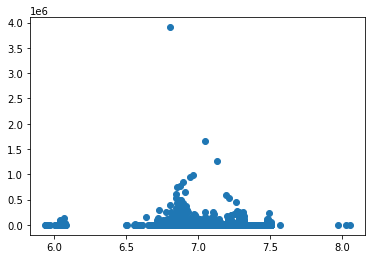

In [ ]:
# y=[]
# x=[]
# for index, row in features_df.iterrows():
#   fare=float(row['fare'])
#   dist=float(row['dist'])*100
#   # print(dist,index)
#   if(row['drop_lon']<65):
#     continue
#   else:

#     x.append(row['pick_lat'])
#     y.append(fare/dist)
  

# plt.scatter(x,y)

# make bins of pickup time

In [ ]:
# datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')
pickup_slot=[]
both="Both"
school="School"
office="Office"
free="free"
for index, row in features_df.iterrows():
  pickup_datetime=row['pickup_time']
  both_start="6:00"
  both_end="10:00"
  school_start="13:30"
  school_end="14:30"
  office_start="16:30"
  office_end="19:30"

  pickup_time=datetime.strptime(pickup_datetime.split(" ")[1],'%H:%M')
  both_start_time=datetime.strptime(both_start,'%H:%M')
  both_end_time=datetime.strptime(both_end,'%H:%M')
  school_start_time=datetime.strptime(school_start,'%H:%M')
  school_end_time=datetime.strptime(school_end,'%H:%M')
  office_start_time=datetime.strptime(office_start,'%H:%M')
  office_end_time=datetime.strptime(office_end,'%H:%M')
  
  if(pickup_time> both_start_time and pickup_time<both_end_time):
    pickup_slot.append(both)
    # print(pickup_time,both)
  elif(pickup_time> school_start_time and pickup_time<school_end_time):
    pickup_slot.append(school)
    # print(pickup_time,school)
  elif(pickup_time>office_start_time and pickup_time<office_end_time):
    pickup_slot.append(office)
    # print(pickup_time,office)
  else:
    pickup_slot.append(free)
    print(pickup_time,free)
  

  
pickup_slot

Streaming output truncated to the last 5000 lines.
1900-01-01 22:18:00 free
1900-01-01 22:22:00 free
1900-01-01 22:32:00 free
1900-01-01 22:56:00 free
1900-01-01 23:48:00 free
1900-01-01 00:35:00 free
1900-01-01 01:00:00 free
1900-01-01 01:05:00 free
1900-01-01 01:37:00 free
1900-01-01 01:59:00 free
1900-01-01 02:02:00 free
1900-01-01 05:01:00 free
1900-01-01 10:03:00 free
1900-01-01 10:11:00 free
1900-01-01 10:15:00 free
1900-01-01 10:15:00 free
1900-01-01 10:26:00 free
1900-01-01 10:33:00 free
1900-01-01 10:36:00 free
1900-01-01 10:44:00 free
1900-01-01 10:45:00 free
1900-01-01 10:58:00 free
1900-01-01 10:59:00 free
1900-01-01 11:02:00 free
1900-01-01 11:03:00 free
1900-01-01 11:03:00 free
1900-01-01 11:03:00 free
1900-01-01 11:04:00 free
1900-01-01 11:08:00 free
1900-01-01 11:13:00 free
1900-01-01 11:19:00 free
1900-01-01 11:20:00 free
1900-01-01 11:25:00 free
1900-01-01 11:29:00 free
1900-01-01 11:30:00 free
1900-01-01 11:31:00 free
1900-01-01 11:32:00 free
1900-01-01 11:34:00 free

['free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'Both',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'School',
 'School',
 'School',
 'School',
 'School',
 'School',
 'School',
 'School',
 'School',
 'School',
 'School',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free',
 'free

In [ ]:
features_df['Time_type']=pickup_slot
features_df

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,dist,Time_type
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,0.045869,free
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,0.028500,free
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,0.057019,free
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,0.007806,free
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,0.073717,free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,0.019087,free
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,0.098307,free
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,0.009405,free
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31,0.026057,free


# Define featues

In [ ]:
features=['additional_fare','duration','meter_waiting','meter_waiting_fare','meter_waiting_till_pickup','fare','dist']
num_features=['additional_fare','duration','meter_waiting','meter_waiting_fare','meter_waiting_till_pickup','fare','dist']
cat_features=['Time_type']


In [ ]:
final_features_df=features_df[features]
final_features_df

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,dist
0,10.5,834.0,56.0,0.0000,64.0,270.32,0.045869
1,10.5,791.0,47.0,0.0000,134.0,197.85,0.028500
2,10.5,1087.0,80.0,0.0000,61.0,301.64,0.057019
3,10.5,598.0,271.0,15.6638,68.0,82.30,0.007806
4,NaN,NaN,NaN,NaN,NaN,358.39,0.073717
...,...,...,...,...,...,...,...
17171,10.5,838.0,93.0,5.4219,451.0,198.26,0.019087
17172,10.5,2151.0,428.0,0.0000,39.0,581.23,0.098307
17173,10.5,263.0,9.0,0.0000,110.0,76.20,0.009405
17174,10.5,858.0,115.0,0.0000,317.0,133.31,0.026057


#Preprocess Pipeline

In [ ]:
preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy="mean"))
])

cat_preprocessing_steps=Pipeline([
  ('cat_one_hot',OneHotEncoder())
  
  
  
])
preprocessor=ColumnTransformer(
    transformers = [
        ("features", preprocessing_steps, features)
    ],
    remainder="drop"
   
)
d=pd.DataFrame(preprocessor.fit_transform(final_features_df))
# d[0].std()
d

,0,1,2,3,4,5,6
0,-3.253376e-02,-1.070020e-01,-7.106395e-02,-6.886545e-02,-1.096375e-01,-0.069913,0.004482
1,-3.253376e-02,-1.122972e-01,-7.218006e-02,-6.886545e-02,4.870523e-02,-0.189631,-0.037597
2,-3.253376e-02,-7.584681e-02,-6.808766e-02,-6.886545e-02,-1.164237e-01,-0.018174,0.031492
3,-3.253376e-02,-1.360638e-01,-4.440135e-02,-3.521680e-02,-1.005894e-01,-0.380515,-0.087733
4,-1.511175e-17,3.349444e-18,-6.280208e-18,-1.632854e-17,1.559585e-17,0.075576,0.071946
...,...,...,...,...,...,...,...
17167,-3.253376e-02,-1.065095e-01,-6.647550e-02,-5.721824e-02,7.657718e-01,-0.188954,-0.060402
17168,-3.253376e-02,5.517756e-02,-2.493145e-02,-6.886545e-02,-1.661885e-01,0.443699,0.131519
17169,-3.253376e-02,-1.773168e-01,-7.689252e-02,-6.886545e-02,-5.583723e-03,-0.390592,-0.083858
17170,-3.253376e-02,-1.040466e-01,-6.374724e-02,-6.886545e-02,4.626585e-01,-0.296249,-0.043517


# model define

In [ ]:
estimator=RandomForestClassifier(bootstrap=False,max_depth=100,max_features='auto',min_samples_leaf=1,min_samples_split=2,n_estimators=1000)

estimator
# rf_random.best_params_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#Full pipeline define

In [ ]:
full_Pipeline=Pipeline([
  ("preprocess",preprocessor),
  ("estimator",estimator)
])
labels_df
final_features_df

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,dist
0,10.5,834.0,56.0,0.0000,64.0,270.32,0.045869
1,10.5,791.0,47.0,0.0000,134.0,197.85,0.028500
2,10.5,1087.0,80.0,0.0000,61.0,301.64,0.057019
3,10.5,598.0,271.0,15.6638,68.0,82.30,0.007806
4,NaN,NaN,NaN,NaN,NaN,358.39,0.073717
...,...,...,...,...,...,...,...
17171,10.5,838.0,93.0,5.4219,451.0,198.26,0.019087
17172,10.5,2151.0,428.0,0.0000,39.0,581.23,0.098307
17173,10.5,263.0,9.0,0.0000,110.0,76.20,0.009405
17174,10.5,858.0,115.0,0.0000,317.0,133.31,0.026057


In [ ]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 12)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]


# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# pprint(random_grid)

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV


# rf_random = RandomizedSearchCV(estimator = estimator, param_distributions = random_grid, n_iter = 60, cv = 3, verbose=2, random_state=42)

# rf_random.get_params()

#split dataset

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(
    d,
    labels_df,
    test_size=0.3,
    shuffle=True,
    random_state=6
)
X_train

,0,1,2,3,4,5,6
16726,0.169525,-0.160446,-0.068460,-0.068865,-0.087017,-0.294679,-0.062641
7845,-0.032534,-0.206748,-0.075404,-0.068865,-0.191071,-0.416528,0.147856
17126,0.270555,0.321044,0.084943,0.094287,0.806488,0.973633,0.104777
12332,-0.032534,0.036214,-0.047874,-0.038432,-0.211429,0.105129,0.082586
16309,-0.032534,0.202826,0.018845,-0.068865,-0.100589,0.373293,0.121787
...,...,...,...,...,...,...,...
7243,-0.032534,-0.003931,-0.026916,-0.068865,-0.139044,-0.035304,0.050256
8527,-0.088100,0.055547,0.027650,0.037838,-0.254408,0.038307,-0.012822
4714,-0.088100,-0.175347,-0.077761,-0.068615,-0.254408,-0.383671,-0.085086
10196,-0.032534,-0.164017,-0.074164,-0.068865,0.039657,-0.341612,-0.063827


In [ ]:
oversampler=SMOTE(random_state=0)
os_features,os_labels=oversampler.fit_sample(X_train,y_train)
os_labels

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
len(os_labels[os_labels==0])

10833

# train model

In [ ]:
np.testing.assert_array_equal(final_features_df.index.values,labels_df.index.values)
# payments_df


In [ ]:
# full_Pipeline.fit(os_features,os_labels['lb'])
estimator.fit(os_features,os_labels)
# rf_random.fit(os_features,os_labels)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_random.best_params_
# estimator.score(X_eval,y_eval['lb'])

In [ ]:
y_pred=estimator.predict(X_eval)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# full_Pipeline.score(X_eval,y_eval['lb'])

In [ ]:
metrics.SCORERS.keys()

In [ ]:
from sklearn.model_selection import cross_val_score
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(full_Pipeline, final_features_df, labels_df['lb'], cv=kfold, scoring='f1')
cv_results.mean()

0.9728715689889565

In [ ]:
f1_score(y_eval, y_pred)

0.9618320610687023

# train for full dataset

In [ ]:
features

In [ ]:
# predict=estimator.predict(preprocessed_test_features);

In [ ]:
test_df['dist']=getDist(test_df)
test_df

In [ ]:
prepros_test=pd.DataFrame(preprocessor.fit_transform(test_df))
prepros_test

In [ ]:
t=estimator.predict(prepros_test)
t

In [ ]:
submission_df['prediction']=t

In [ ]:
submission_df

In [ ]:
submission_df.to_csv("submission_3.csv",index=True)